<a href="https://colab.research.google.com/github/weissd2k/Jinchang-2021-22/blob/main/davies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The code to load the drive files.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Import library

In [ ]:
! pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import math
import os
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import tkinter
import tkinter.messagebox
import matplotlib.pyplot as plt
import pandas as pd
from fuzzywuzzy import process

# Set the mental and ligand, which offerd by user in UI for py files. The UI can't excute in notebook

Change this part of code to change the mental and ligand you want to study, exp: "Fe". "EDTA", Have to be same as the format in database.

ligands: 
Diethylamine,Cyanide,Edta,Two_methylpyridine,Three_methylpyridine,Four_methylpyridine,Ethylenediamine,FeCyanide6,Para_acetate,Benzoate,Glutamate,Glycine,Citrate,Phthalate,Acetate,Propanoate,Butanoate,Propylamine,Npropylamine,Isopropylamine,Ethylenediamine,Phenylacetate,Nta,Propionate,Three_picoline,Butyrate,Four_picoline,Formate,Tartarate

metal:
Zn, Fe, Ni, Co, Mo 

In [ ]:
mental = "Zn"
ligand ="Citrate"

# Davies function

## 1. Get all database files inside database folder

In [ ]:
dirlast = "/content/gdrive/MyDrive/IRP"

def readDir(dirPath):
    allFiles = []
    if os.path.isdir(dirPath):
        fileList = os.listdir(dirPath)
        for f in fileList:
            if(f!="extraction" and f!=".DS_Store"):    
             f = dirPath+'/'+f
             allFiles.append(f)
    return allFiles 

## 2. Begin davies opreation

The output tabel include reaction, stability constant is generate in davies folder. The validate tabel include activity conficient is in validate folder. The figure of the logb/ionic strength is in lepfig folder.

In [ ]:
def davies(mental,ligand):
    logk = []
    reaction = []
    datafrom = []
    z005 = []
    z015 = []
    z03 = []
    z05 = []
    z1 = []
    v005 = []
    v015 = []
    v03 = []
    v05 = []
    v1 = []
    
    file = dirlast+ '/data'+'/minteq.v4' '.txt' 
    f = open(file,'r')
    dataset = file[file.find("data")+5:50].strip(".txt")
    check = 0
    check2 = 0
    lines = f.readlines()
    master =dirlast+ '/davies'+'/'+ 'MASTER_SPECIES' + '.txt'
    outputs = open(master, 'w')
    for i in range(len(lines)):
          if check ==0:
              if mental in lines[i]:
                   outputs.write(lines[i])
                   check = 2
          if check2 ==0:
              if ligand in lines[i]:
                   outputs.write(lines[i])
                   check2 = 3
          if mental in lines[i]:
             if ligand in lines[i]:
             # if "E" in lines[i]:
              if "log_k"in lines[i+1]:
               judge = True
               react = lines[i]
               reaction.append(react)
               k = lines[i+1][lines[i+1].find("k")+1:20].strip()
               logk.append(float(k))
               datafrom.append(dataset)
    
    outputs.close()
    k = 0 
    txt = dirlast+ '/davies'+'/'+mental+ligand+ '.txt'  
    output = open(txt, 'w') 
    tabel =dirlast+ '/davies'+'/'+ mental + ligand + '.csv' 
    validate = dirlast+ '/validate'+'/'+  mental + ligand + '.csv'
    names = []
    for r in reaction:
     r = r.strip()
     log_k = logk[k]
     print(r)
     output.write(r)
     output.write("\n")
     output.write("----------------------------------------------------")
     output.write("\n")
     output.write("logk: " + str(log_k))
     print(log_k)
     output.write("\n")
     output.write("Find from: "+datafrom[k])
     output.write("\n")
     output.write("\n")
     output.write("----------------------------------------------------")
     output.write("\n")
     symbol = []
     num = []
     k = k+1
    
     # 0 is on the left, 1 is on the right
     position = []
     amount = []
     logb = []              
     #Find all index of space
     elements = [each.start() for each in re.finditer(" ", r)]  
     
     number = int((len(elements)-2)/2+2)
     
     equal = r.find("=")
     name = r[equal+2:len(r)]
     names.append(name)
     
     
     # Do operation to the first elements eg. Zn+2 + 2Citrate-3 = Zn(Citrate)2-4
     # Judge the first character if or not a digit
     if r[0].isdigit():
        amount.append(float(r[0]))
     else:
        amount.append(1.00)
     # Judge the last character of first elements, which is 2 in this exp, if or not a digit
     if r[elements[0]-1:elements[0]].isdigit():
      num.append(float(r[elements[0]-1:elements[0]]))
      # To find the +,- of the elements, do loop to check each character in Zn+2 if 
     #  or not a letter in this exp.
      for i in range(0,elements[0]-1):   
       if not r[i].isalnum():
        if r[i] != " ":
          symbol.append(r[i])
     # Else Judge the last character of first elements, is a letter or not, 
     #eg. H20 end of letter with 0 num.
     elif r[elements[0]-1:elements[0]]=="+" or r[elements[0]-1:elements[0]]=="-" :
        symbol.append("NA")
        num.append(1.00)
      # Else if the last character of first elements, is +, - the num is 1.
     else:
        num.append(0.00)
        symbol.append(r[elements[0]-1:elements[0]])
    
     position.append(0)
     
     for i in range(number):
       # Do operation to the  elements between first and last
       if i !=0 and i != number-1:
        #  locate the location of them, same as before
        if r[elements[i*2]-1:elements[i*2]].isdigit():
         num.append(float(r[elements[i*2]-1:elements[i*2]]))
         for j in range(elements[(i-1)*2+1],elements[i*2]-1):
             if not r[j].isalnum():
                 if r[j] != " ":
                  symbol.append(r[j])
        elif r[elements[i*2]-1:elements[i*2]]=="+" or r[elements[i*2]-1:elements[i*2]]=="-":
         symbol.append("NA")
         num.append(1.00)
        else:
             num.append(1.00)
             symbol.append(r[elements[i*2]-1:elements[i*2]])  
        # Juge it's position by compare with the " = "
        if elements[i*2]-1 < equal:
            position.append(0)
        else:
            position.append(1.00)
    
        if r[elements[i*2-1]+1:elements[i*2-1]+2].isdigit():
         
         amount.append(float(r[elements[i*2-1]+1:elements[i*2-1]+2]))
        else:
         amount.append(1.00)
    # Do operation to the last one
     if r[len(r)-1:len(r)].isdigit():
      num.append(float(r[len(r)-1:len(r)]))
      for i in range(elements[len(elements)-1],len(r)):   
       if not r[i].isalnum():
        if r[i] != " ":
          symbol.append(r[i])
     elif r[len(r)-1:len(r)]=="+" or r[len(r)-1:len(r)]=="-":
         symbol.append("NA")
         num.append(1.00)
         
     else:
        num.append(0.00)
        symbol.append(r[len(r)-1:len(r)])
     position.append(1.00) 
    
     if r[elements[len(elements)-1]+1].isdigit():
        amount.append(float(r[elements[len(elements)-1]+1]))
     else:
        amount.append(1.00)
              
     cals1 = 0.0
     cals2 = 0.0
     cals3 = 0.0
    
     ionic = [0.05,0.15,0.3,0.5,1]
     coe = []
    # Do caculation to the full ionic dataset.
     for ion in ionic:
      cal = []
      coefcient = 0.00
      for i in range(len(position)):
            cals1 = -0.51*num[i]*num[i]
            cals2 =math.sqrt(ion)/(1+math.sqrt(ion)) - 0.3 * ion
            cals3 = cals1*cals2*amount[i]
            if position[i]==1:
                cals3 = -cals3
            cal.append(cals3)
      for c in cal:
        coefcient = coefcient +c
      coe.append(coefcient) 
      
    
     for co in coe:
        logB = co+log_k 
        logb.append(round(logB,3))
     plot = logb
     io = [0.05,0.15,0.3,0.5,1]
     plt.plot(io, plot, ls="-",color="r",marker =",", lw=2, label=r)
     plt.xlabel('Ionic Strength')
     plt.ylabel('LogB')
     plt.legend()
     plt.savefig(dirlast+ '/daviesfig/'+name.strip()+'.jpg',bbox_inches='tight')
     plt.show()
     z005.append(logb[0])
     z015.append(logb[1])
     z03.append(logb[2])
     z05.append(logb[3])
     z1.append(logb[4])
     v005.append(-coe[0])
     v015.append(-coe[1])
     v03.append(-coe[2])
     v05.append(-coe[3])
     v1.append(-coe[4])
     for i in range(len(ionic)):
        print("ionic " + str(ionic[i])+"： " + str(-coe[i])) 
        print("logb when ionic " + str(ionic[i])+"： " + str(logb[i]))
        output.write("ionic " + str(ionic[i])+"： " + str(logb[i]))
        output.write("\n")
        
     output.write("----------------------------------------------------")    
     output.write("\n")
    
    output.close()
    data = {"Reaction":reaction,"logk":logk,"0.05":z005,"0.15":z015,"0.3":z03,"0.5":z05,"1":z1}
    dataframe=DataFrame(data)
    dataframe.to_csv(tabel,index=False,sep=',')
    
    
    datas = {"species":names,"logk":logk,"0.05":v005,"0.15":v015,"0.3":v03,"0.5":v05,"1":v1}
    dataframe=DataFrame(datas)
    dataframe.to_csv(validate,index=False,sep=',')
    fileList = os.listdir(dirlast+ '/davies')
    for fl in fileList:
     if os.path.getsize(dirlast+ '/davies/'+fl) == 0:
                os.remove(dirlast+ '/davies/'+fl)
                return False
    return True

Zn+2 + Citrate-3 = Zn(Citrate)-
6.21


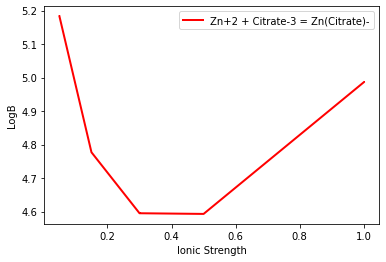

ionic 0.05： 1.0265932655051275
logb when ionic 0.05： 5.183
ionic 0.15： 1.43314800926934
logb when ionic 0.15： 4.777
ionic 0.3： 1.6150029313308807
logb when ionic 0.3： 4.595
ionic 0.5： 1.616987001723342
logb when ionic 0.5： 4.593
ionic 1： 1.224
logb when ionic 1： 4.986
Zn+2 + 2Citrate-3 = Zn(Citrate)2-4
7.4


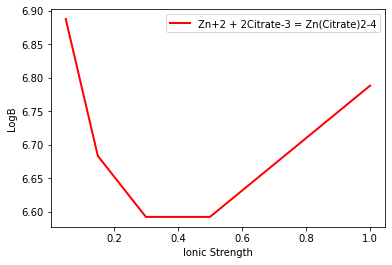

ionic 0.05： 0.5132966327525637
logb when ionic 0.05： 6.887
ionic 0.15： 0.7165740046346698
logb when ionic 0.15： 6.683
ionic 0.3： 0.8075014656654407
logb when ionic 0.3： 6.592
ionic 0.5： 0.8084935008616707
logb when ionic 0.5： 6.592
ionic 1： 0.6120000000000001
logb when ionic 1： 6.788
Zn+2 + Citrate-3 + H+ = ZnH(Citrate)
10.2


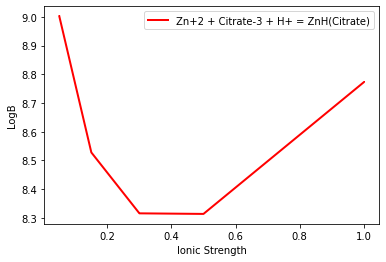

ionic 0.05： 1.1976921430893153
logb when ionic 0.05： 9.002
ionic 0.15： 1.67200601081423
logb when ionic 0.15： 8.528
ionic 0.3： 1.8841700865526942
logb when ionic 0.3： 8.316
ionic 0.5： 1.886484835343899
logb when ionic 0.5： 8.314
ionic 1： 1.4280000000000002
logb when ionic 1： 8.772
Zn+2 + Citrate-3 + 2H+ = ZnH2(Citrate)+
12.84


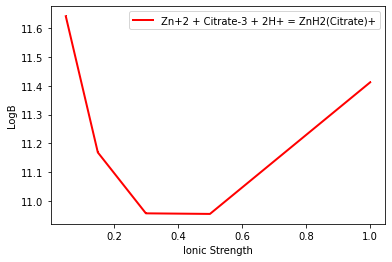

ionic 0.05： 1.1976921430893155
logb when ionic 0.05： 11.642
ionic 0.15： 1.67200601081423
logb when ionic 0.15： 11.168
ionic 0.3： 1.884170086552694
logb when ionic 0.3： 10.956
ionic 0.5： 1.8864848353438992
logb when ionic 0.5： 10.954
ionic 1： 1.428
logb when ionic 1： 11.412


True

In [ ]:
davies(mental ,ligand)

## 3. Plot several lines of reactions inside one figure.`

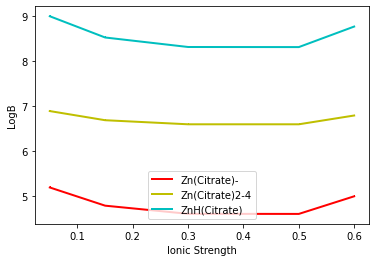

In [ ]:
tabel =dirlast+ '/davies'+'/'+mental+ligand+ '.csv' 
df = pd.read_csv(tabel)
name = []
ionic = [0.05,0.15,0.3,0.5,0.6]
logb= []
for i in range(0,3):
    r = df.iloc[i,0]
    equal = r.find("=")
    names = r[equal+2:len(r)].strip("\n")
    name.append(names)
    logbs = []
    for j in range(2,7):
       logbs.append(df.iloc[i,j])
    logb.append(logbs)
colors = ['r','y','c','g','b','k','r','y','c','g','b','k']
a = ""
for i in range(len(logb)):
 plt.plot(ionic,logb[i] , ls="-",color=colors[i],marker =",", lw=2, label=name[i])
 a = name[i]+"_"+ a
plt.xlabel('Ionic Strength')
plt.ylabel('LogB')
plt.legend()
plt.savefig(dirlast+ '/daviesfig/'+a+'.jpg',bbox_inches='tight')
plt.show()

# Get the LEP and draw the LEP by ph excel files.

The lep figure will be output in lepfig folder. The txt file include the information of lep is in lepout folder

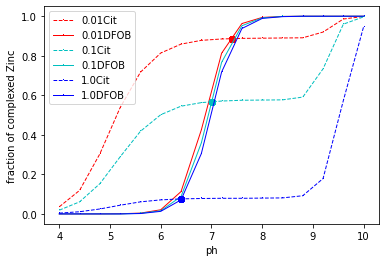

In [ ]:
tabel =dirlast+'/lepcsv/ph.csv' 
df = pd.read_csv(tabel)
fraction = []
name = []
cur =[]
w = []
namee = ""
namee = str(df.iloc[1,1]).strip("\xa0") + "_"+str(df.iloc[0,1]).strip("\xa0")
for i in range(6):
 cur = []
 name.append(str(df.iloc[i,0])+df.iloc[i,1].strip("\xa0"))
 for j in range(2,18):
    cur.append(float(df.iloc[i,j].strip("\xa0")))
 fraction.append(cur)
    
ph = [4 ,4.4 ,4.8 ,5.2 ,5.6 ,6 ,6.4 ,6.8 ,7.2 ,7.6 ,8 ,8.4 ,8.8 ,9.2 ,9.6 ,10]
print()
colors = ['r','r','c','c','b','b','y','y']
c = ['ro','ro','co','co','bo','bo','yo','yo']
lss = ['--','-','--','-','--','-','--','-']
a = ""
for i in range(len(fraction)):
 
  plt.plot(ph,fraction[i] ,ls=lss[i],color=colors[i],marker =",", lw=1,label=name[i])
  # Get the common range, from `max(x1[0], x2[0])` to `min(x1[-1], x2[-1])`   
  cur = 0
  mins = 10000
  loc = -1
  
  if i%2 == 1:
      for j in range(len(fraction[0])):
           cur = abs(fraction[i-1][j]-fraction[i][j])
           if cur<mins and fraction[i-1][j]<0.9 and fraction[i-1][j]>0.02 and fraction[i][j]<0.9 and fraction[i][j]>0.02:
               mins = cur
               loc = j
      if loc !=-1:
       #Get the point to be infinitely close
       x3 = np.linspace(ph[loc], ph[loc+1], 10000)       
       y1_new = np.linspace(fraction[i-1][loc], fraction[i-1][loc+1], 10000) 
       y2_new = np.linspace(fraction[i][loc], fraction[i][loc+1], 10000) 
       idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.0001)).reshape(-1)
       if idx.any():
        plt.plot(x3[idx], y2_new[idx], c[i])
       else:
        x3 = np.linspace(ph[loc-1], ph[loc], 10000)       
        y1_new = np.linspace(fraction[i-1][loc-1], fraction[i-1][loc], 10000)
        y2_new = np.linspace(fraction[i][loc-1], fraction[i][loc], 10000)  
        idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.0001)).reshape(-1)
        plt.plot(x3[idx], y2_new[idx], c[i])
       w.append([df.iloc[i,0],round(max(x3[idx]),3), round(max(y2_new[idx]),3)])
 
plt.xlabel('ph')
plt.ylabel('fraction of complexed Zinc')

plt.legend()
plt.savefig(dirlast+ '/lepfig/'+namee+'_ph.jpg',bbox_inches='tight')
plt.show()

outputs = open(dirlast+ '/lepout/'+namee+'_ph.txt', 'w')
for i in range(len(w)):
  outputs.write("ionic strength:"+str(w[i][0]))
  outputs.write("\n")
  outputs.write("ph:"+str(w[i][1]))
  outputs.write("\n")
  outputs.write("Fraction:"+str(w[i][2]))
  outputs.write("\n")
  outputs.write("---------------------------------")
  outputs.write("\n")
outputs.close()

# Get the LEP and draw the LEP by ionic excel files.

[[0.052, 0.04, 0.025, 0.019, 0.014, 0.009, 0.007, 0.005, 0.004], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.914, 0.848, 0.644, 0.502, 0.342, 0.193, 0.129, 0.093, 0.071], [0.195, 0.175, 0.144, 0.13, 0.118, 0.111, 0.106, 0.104, 0.106], [0.965, 0.917, 0.727, 0.576, 0.393, 0.22, 0.146, 0.104, 0.08], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


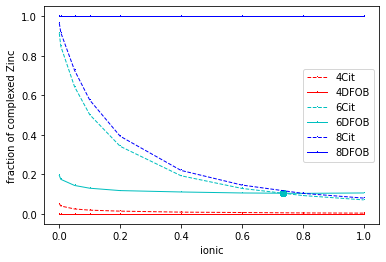

[[6, 0.736, 0.105]]


In [ ]:
tabel =dirlast+'/lepcsv/ionic.csv' 
df = pd.read_csv(tabel)
fraction = []
name = []
cur =[]
w = []
namee = ""
namee = str(df.iloc[1,1]).strip("\xa0") + "_"+str(df.iloc[0,1]).strip("\xa0")

for i in range(6):
 cur = []
 name.append(str(df.iloc[i,0])+df.iloc[i,1].strip("\xa0"))
 for j in range(2,11):
    cur.append(float(df.iloc[i,j]))
 fraction.append(cur)
    
ionic = [ 0, 0.005 ,0.05 ,0.1 ,0.2 ,0.4,0.6 ,0.8,1]

colors = ['r','r','c','c','b','b','y','y']
c = ['ro','ro','co','co','bo','bo','yo','yo']
lss = ['--','-','--','-','--','-','--','-']
a = ""
print(fraction)
for i in range(len(fraction)):
 
  plt.plot(ionic,fraction[i] ,ls=lss[i],color=colors[i],marker =",", lw=1,label=name[i])
  # Get the common range, from `max(x1[0], x2[0])` to `min(x1[-1], x2[-1])`   
  cur = 0
  mins = 10000
  loc = -1
  
  if i%2 == 1:
        for j in range(len(fraction[0])):
             cur = abs(fraction[i-1][j]-fraction[i][j])
             if cur<mins and fraction[i-1][j]<0.9 and fraction[i-1][j]>0.02 and fraction[i][j]<0.9 and fraction[i][j]>0.02:
                 mins = cur
                 loc = j
        #Get the point to be infinitely close
        if loc !=-1:
         x3 = np.linspace(ionic[loc], ionic[loc+1], 10000)        
         y1_new = np.linspace(fraction[i-1][loc], fraction[i-1][loc+1], 10000) 
         y2_new = np.linspace(fraction[i][loc], fraction[i][loc+1], 10000)  
         idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.0001)).reshape(-1)
         if idx.any():
          plt.plot(x3[idx], y2_new[idx], c[i])
         else:
          x3 = np.linspace(ionic[loc-1], ionic[loc], 10000)       
          y1_new = np.linspace(fraction[i-1][loc-1], fraction[i-1][loc], 10000) 
          y2_new = np.linspace(fraction[i][loc-1], fraction[i][loc], 10000) 
          idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.0001)).reshape(-1)
          plt.plot(x3[idx], y2_new[idx], c[i])
         w.append([df.iloc[i,0],round(max(x3[idx]),3), round(max(y2_new[idx]),3)])  
 
plt.xlabel('ionic')
plt.ylabel('fraction of complexed Zinc')

plt.legend()
plt.savefig(dirlast+ '/lepfig/'+namee+'_ion.jpg',bbox_inches='tight')
plt.show()

outputs = open(dirlast+ '/lepout/'+namee+'_ion.txt', 'w')

for i in range(len(w)):
  outputs.write("ph:"+str(w[i][0]))
  outputs.write("\n")
  outputs.write("ion:"+str(w[i][1]))
  outputs.write("\n")
  outputs.write("Fraction:"+str(w[i][2]))
  outputs.write("\n")
  outputs.write("---------------------------------")
  outputs.write("\n")
outputs.close()
print(w)

# The code to search from the database


The serach result tabel will generate in tabel folder

In [ ]:
# fix search Extract
def extract(text):
  # The path of the output files.
  tabel =dirlast+ '/tabel'+'/'+ text + '.csv'
  logk = []
  reaction = []
  datafrom = []
  #Read files 
  for file in readDir(dirlast+"/data"):
    f = open(file,'r')
    # Save the dataset this search result from 
    dataset = file[file.find("data")+5:50].strip(".txt")
    check = 0
    lines = f.readlines()
    linenumber = 0
    # Begin the search
    for i in range(len(lines)-2):
      # First ensure the search text is in this line, and then ensure it is a reaction by "="
      if text in lines[i] and  "=" in lines[i]:
          # There is two format of logk, neighboor and two lines behind the last one.
          if "log_k"in lines[i+1]:
           linenumber = i+1
          if "log_k"in lines[i+2]:
           linenumber = i+2
          # Extract logK according to the different situation
          if "log_k"in lines[i+1] or "log_k"in lines[i+2]:
          # Get the reaction
           react = lines[i].strip().strip('#').strip()
           reaction.append(react)
           # Get logk
           k = lines[linenumber][lines[linenumber].find("k")+1:50].strip()
           # only save the logk when k not euaql to  0
           if k != 0:
            logk.append(k)
            datafrom.append(dataset)
            # Write the output file.
            
            # Save the data into dataframe 
            data = {"Reaction":reaction,"logk":logk,"dataset":datafrom}
            dataframe=DataFrame(data)
            # Save the dataframe to the csv file.
            dataframe.to_csv(tabel,index=False,sep=',')
  return dataframe


def fuzzyextract(text,number = 100):
  # The path of the output files.
  tabel =dirlast+ '/tabel'+'/'+ text + '.csv'
  # List conclude all logk value.
  logk = []
  # List conclude all reaction text.
  reaction = []
  # List conclude all dataset the reaction from.
  datafrom = []
  logknew = []
  reactionnew = []
  datafromnew = []
  name = []
  namenew = []
  
  for file in readDir(dirlast+"/data"):
    f = open(file,'r')
    dataset = file[file.find("data")+5:50].strip(".txt")
    check = 0
    ks = 0.02
    lines = f.readlines()
    checkifexist = False
    linenumber = 0
    for i in range(len(lines)-2):
      checks = False
      # Save all the reactions
      if  "=" in lines[i]:
         # if "E" in lines[i]:
          if "log_k"in lines[i+1]:
           linenumber = i+1
           checks = True
          if "log_k"in lines[i+2]:
           linenumber = i+2
           checks = True
          ks = lines[linenumber][lines[linenumber].find("k")+1:50].strip()
          
          if "#" in ks:
               ks = ks[0: ks.find("#")-2]
          if checks==True:
           
           react = lines[i].strip().strip('#').strip()
           named = lines[i-1].strip()
           reaction.append(react)
           name.append(named)
           k = ks
           logk.append(k)
           datafrom.append(dataset)
  # Do fuzzy serach to the all reactions to match the search text.
  m = process.extract(text, reaction, limit=number)  
  # Save the serach result.
  for j in range(len(reaction)):
      for best in m:
          if best[0] in reaction[j]:
            if check== 0:
              reactionnew.append(best[0])
              datafromnew.append(datafrom[j])
              logknew.append(logk[j])
              namenew.append(name[j])
              check = check+1
            else:
                for o in range(len(reactionnew)):
                    if best[0] in reactionnew[o] and logk[j] in logknew[o]:
                        checkifexist = True
                if checkifexist == False:
                       reactionnew.append(best[0])
                       datafromnew.append(datafrom[j])
                       logknew.append(logk[j])
                       namenew.append(name[j]) 
                checkifexist = False
               
  data = {"Reaction":reactionnew,"logk":logknew,"dataset":datafromnew,"name":namenew}
           
  dataframe=DataFrame(data)
        
  dataframe.to_csv(tabel,index=False,sep=',')      
  fileList = os.listdir(dirlast+ '/tabel')
  for fl in fileList:
     if os.path.getsize(dirlast+ '/tabel/'+fl) == 0:
                os.remove(dirlast+ '/tabel/'+fl)
                return False
  return dataframe

Give the search text and the fuzzy searchtext, number

In [ ]:
search  ="ZnEdta"
fuzzy = "FES"
Number = 100

Run the seach code, the output file will in the tabel folder and the output folder

In [ ]:
print(fuzzyextract(fuzzy,number = 100))

                          Reaction      logk         dataset  \
0                          e- = e-       0.0  Tipping_Hurley   
1                          F- = F-       0.0  Tipping_Hurley   
2                      Fe+2 = Fe+2       0.0  Tipping_Hurley   
3                 Fe+2 = Fe+3 + e-   -13.020  Tipping_Hurley   
4         Fe+3 + H2O = FeOH+2 + H+     -2.19  Tipping_Hurley   
..                             ...       ...             ...   
79           FeS + H+ = Fe+2 + HS-     -2.95       minteq.v4   
80           FeS + H+ = Fe+2 + HS-      -3.6       minteq.v4   
81  FeS2 + 2H+ + 2e- = Fe+2 + 2HS-  -18.5082       minteq.v4   
82         FeSe + H+ = Fe+2 + HSe-       -11       minteq.v4   
83            FeCO3 = Fe+2 + CO3-2    -10.24       minteq.v4   

                                 name  
0          #e- primary master species  
1          #F- primary master species  
2        #Fe+2 primary master species  
3   #Fe+3 secondary master species  0  
4              #FeOH+2         

In [ ]:
print(extract(search))

                   Reaction   logk dataset
0  Zn+2 + Edta-4 = ZnEdta-2  16.44  minteq
